# **Importing Libraries and datasets**

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [3]:
# loading the MNIST datasets
(X_train ,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
#size of training datasets
len(X_train)

60000

In [5]:
#size of test datasets
len(X_test)

10000

In [6]:
# training dataset shape
X_train.shape

(60000, 28, 28)

In [7]:
# normalising the datset between 0 and 1 since every number is between 0 to 255
X_train = X_train/255
X_test = X_test/255

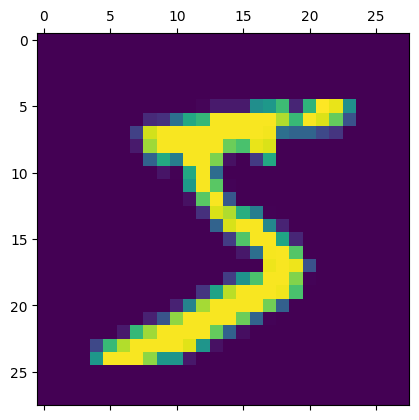

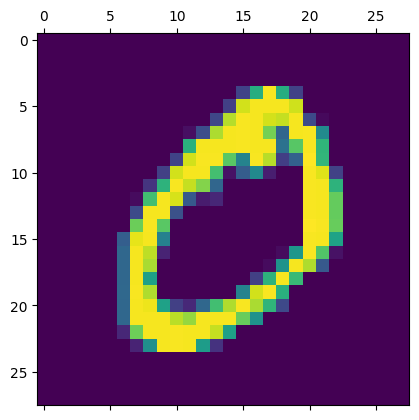

In [8]:
#using matshow to visualise the datasets (digits)
for i in range (2):
  plt.matshow(X_train[i])

In [9]:
# reshaping the datasets to implement the neural network
# 60000 rows has 28 x 28  matrix
# 10000 rows and 28 x 28 matrix
# 28*28 = 784 columns
X_train_flatten = X_train.reshape(60000,28*28)
X_test_flatten = X_test.reshape(10000,28*28)

In [10]:
# checking the shape of our flatten data
X_train_flatten.shape

(60000, 784)

# Simple Neural Network


In [11]:
#Implementation using simple neural network
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) ,activation = 'sigmoid')
    ])

model.compile(
    optimizer = 'Adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['Accuracy']
)
model.fit(X_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4739 - Accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - Accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2836 - Accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - Accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - Accuracy: 0.9259


In [12]:
# evaluating the model of test dataset
model.evaluate(X_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - Accuracy: 0.9271


[0.2672266364097595, 0.9271000027656555]

In [13]:
# predicting on the given data
# every prediction is an array of size 10 with possible probabilities
# one with the maximum probability is the answer
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.8847681e-02, 2.1459087e-07, 7.6044530e-02, 9.5380509e-01,
       2.9698082e-03, 1.3484190e-01, 1.2121883e-06, 9.9978596e-01,
       9.0768456e-02, 6.7485696e-01], dtype=float32)

In [14]:
#getting the maximum probability and expected output
y_final = [np.argmax(i) for i in y_predicted]
y_final[0:5]

[7, 2, 1, 0, 4]

In [15]:
# creating a confusion matrix for visulisation
cm = tf.math.confusion_matrix(labels = y_test ,predictions = y_final)

Text(95.72222222222221, 0.5, 'Truth')

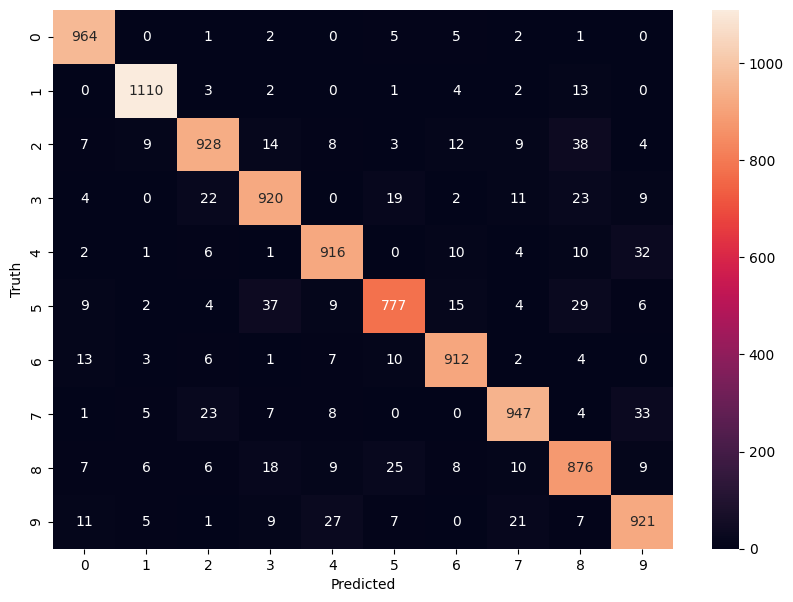

In [16]:
# plotting the heatmap for the good visualisation of data
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Complex Neural Network Model**

In [17]:
# creating a complex neural network
# 392 - 196 - 98 - 49 - 24 - 10
#this would increase the performance of the model
model = keras.Sequential([
    keras.layers.Dense(392 , input_shape = (784,) ,activation = 'relu'),
    keras.layers.Dense(196 ,activation = 'relu'),
    keras.layers.Dense(98 ,activation = 'relu'),
    keras.layers.Dense(49 ,activation = 'relu'),
    keras.layers.Dense(24 ,activation = 'relu'),
    keras.layers.Dense(10 ,activation = 'sigmoid')
    ])

model.compile(
    optimizer = 'Adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['Accuracy']
)
model.fit(X_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2344 - Accuracy: 0.9286
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0962 - Accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0728 - Accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0552 - Accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0455 - Accuracy: 0.9865


In [18]:
#evaluating with new model
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - Accuracy: 0.9802


[0.0731249749660492, 0.9801999926567078]

In [19]:
#prediction using the new model
y_predict = model.predict(X_test_flatten)
y_final1 = [np.argmax(i) for i in y_predict]

313/313 [==============================] - 1s 3ms/step


In [20]:
cm = tf.math.confusion_matrix(labels = y_test ,predictions = y_final1)

Text(95.72222222222221, 0.5, 'Truth')

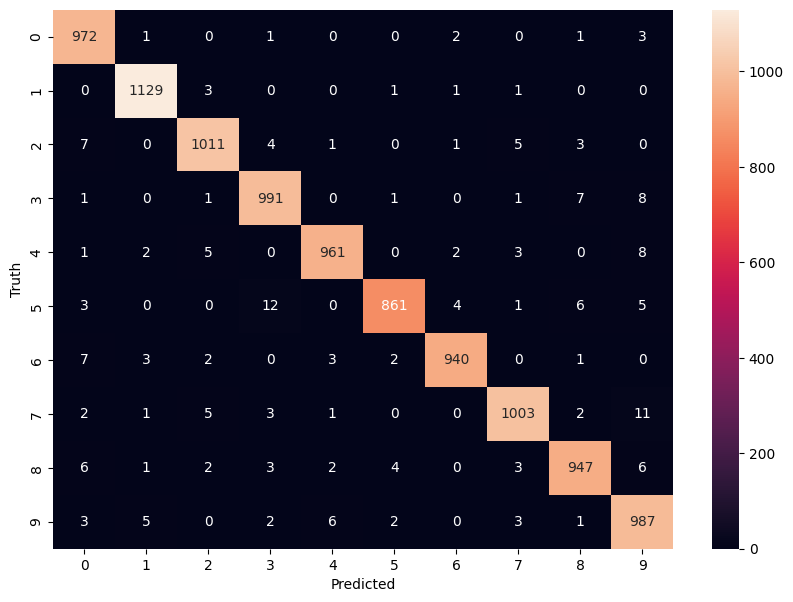

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

As it can be clearly seen that the accuracy for second model has improved very much as compared to the first simple model